AUC: 0.8253
Average Precision (AP): 0.7571

Confusion Matrix:
[[1458  103]
 [1062  499]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.93      0.71      1561
           1       0.83      0.32      0.46      1561

    accuracy                           0.63      3122
   macro avg       0.70      0.63      0.59      3122
weighted avg       0.70      0.63      0.59      3122



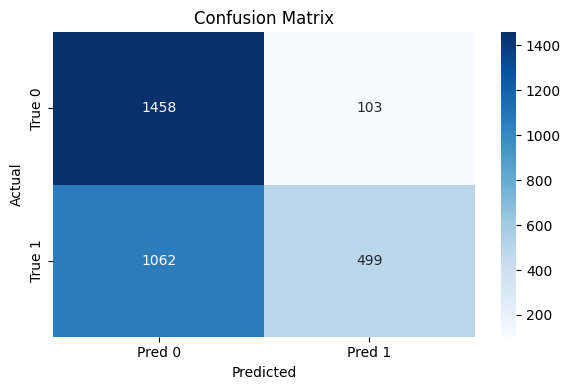


Sample Predictions:
                    user1                   user2     score  actual  predicted
0  _BcWyKQL16ndpBdggh2kNA  V9n2Qyr-dvNg00BwMWqquQ  0.026866       1          0
1  WO6L5yMX5LEeJuMNMjerRQ  _Snvv_nGfpctBG4OOWwGLg  0.051282       1          0
2  8j0ekVUxdDzmiy_KAJ5stg  OIl_ZSc0rDE8iphiAjS-xQ  0.148148       1          1
3  lgUKLRsqvhu4DbM9syzq_Q  ouODopBKF3AqfCkuQEnrDg  0.138889       1          1
4  Oi1qbcz2m2SnwUeztGYcnQ  5GJ5aLTtTjGIiBz7i9GssQ  0.055202       1          0
5  8tG-VOcqZctOrhmhGIhsTg  suRoi6fJjOSdzBMWzaZ5sQ  0.083333       1          0
6  ET8n-r7glWYqZhuR6GcdNw  16yfdXvoj6ra0hqFjLu2cQ  0.008602       1          0
7  I30Q5xP79wRuEWJyfiiarw  q76sFjjZr3QhUzsA8N1jmg  0.088235       1          0
8  6WG2IGTVr-xKn0pYQZJGjw  RBXVFcXR3IjP0CYgmkSmtg  0.019481       1          0
9  QVoy32vmYsjcusOu5ITpDw  oSeE_p_gYxI82APPWJhJjg  0.272727       1          1


In [2]:
import networkx as nx
import pandas as pd
import random
from networkx.algorithms.link_prediction import jaccard_coefficient
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load user-user edges
user_df = pd.read_csv('/Users/jaeeponde/dsm_project/philadelphia/philly_edges.csv')

# Create undirected graph
G = nx.Graph()
G.add_edges_from(user_df[['user_id_1', 'user_id_2']].values)

# --- Train-test split ---
edges = list(G.edges())
random.shuffle(edges)
split = int(len(edges) * 0.1)

test_pos_edges = edges[:split]
G_train = G.copy()
G_train.remove_edges_from(test_pos_edges)

non_edges = list(nx.non_edges(G_train))
test_neg_edges = random.sample(non_edges, split)

# --- Compute Jaccard scores ---
pred_pos = list(jaccard_coefficient(G_train, test_pos_edges))
pred_neg = list(jaccard_coefficient(G_train, test_neg_edges))

# --- Combine predictions ---
y_true = [1] * len(pred_pos) + [0] * len(pred_neg)
y_scores = [score for _, _, score in pred_pos] + [score for _, _, score in pred_neg]
threshold = 0.1  # You can adjust this based on analysis

y_pred = [1 if score > threshold else 0 for score in y_scores]

# --- Evaluation ---
auc = roc_auc_score(y_true, y_scores)
ap = average_precision_score(y_true, y_scores)
cm = confusion_matrix(y_true, y_pred)

print(f"AUC: {auc:.4f}")
print(f"Average Precision (AP): {ap:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# --- Visualize Confusion Matrix ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

# --- Detailed Predictions DataFrame ---
predictions_df = pd.DataFrame({
    'user1': [u for u, v, _ in pred_pos + pred_neg],
    'user2': [v for u, v, _ in pred_pos + pred_neg],
    'score': y_scores,
    'actual': y_true,
    'predicted': y_pred
})

print("\nSample Predictions:")
print(predictions_df.head(10))


AUC: 0.9067
Average Precision (AP): 0.9162

Confusion Matrix:
[[1095  466]
 [ 161 1400]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      1561
           1       0.75      0.90      0.82      1561

    accuracy                           0.80      3122
   macro avg       0.81      0.80      0.80      3122
weighted avg       0.81      0.80      0.80      3122



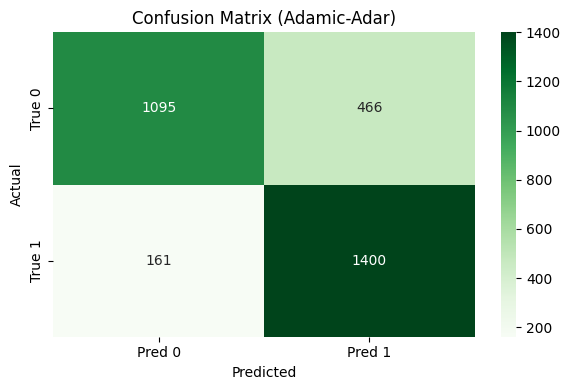


Sample Predictions (Adamic-Adar):
                    user1                   user2     score  actual  predicted
0  SaYctOj-v2LNNkD4EXtZUA  UZOm2svtUK-lGt4oTvh4LA  2.882186       1          1
1  slpyLHWsvPXwj1XPoyjugQ  I30Q5xP79wRuEWJyfiiarw  1.095080       1          1
2  z9sL9d4kfAiQeGJ1dGmBng  Z6QWenzQI3EkNViGwTd32Q  0.756282       1          1
3  cMPJlsuY5IQgJ8N9qICdDw  vNviupO1hQPaCaaeWM6wnQ  0.162473       1          1
4  84HvpQDxcHWmbMDfs8IEYw  1WEHUvZ2Qqlc46_qHsOOFA  2.093029       1          1
5  N9hqTPQu2bmI8c2Pj8F1ww  rHQwXOOwGTa1bb-yzgvqDg  7.574424       1          1
6  6yMeRe_UQMfN1ukGRYhQsA  LnFIWZM_l__4t8Qxj3pnOg  0.314357       1          1
7  1bjo-xG3tKF5rQjRx5zW4Q  7LmJ87EijrHcoYRu9WgoHg  0.247338       1          1
8  aN3hqwdyeT6AmyUq3GgIIA  oknU9tuT6R16XlolOBnWHw  0.872030       1          1
9  0Ear9GEUEvSceG6uDsmyfg  xOr3cP1xO2qC4lx2E9jnBg  1.220183       1          1


In [3]:
import networkx as nx
import pandas as pd
import random
from networkx.algorithms.link_prediction import adamic_adar_index
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load user-user edges
uuser_df = pd.read_csv('/Users/jaeeponde/dsm_project/philadelphia/philly_edges.csv')

# Create undirected graph
G = nx.Graph()
G.add_edges_from(user_df[['user_id_1', 'user_id_2']].values)

# --- Train-test split ---
edges = list(G.edges())
random.shuffle(edges)
split = int(len(edges) * 0.1)

test_pos_edges = edges[:split]
G_train = G.copy()
G_train.remove_edges_from(test_pos_edges)

non_edges = list(nx.non_edges(G_train))
test_neg_edges = random.sample(non_edges, split)

# --- Compute Adamic-Adar scores ---
pred_pos = list(adamic_adar_index(G_train, test_pos_edges))
pred_neg = list(adamic_adar_index(G_train, test_neg_edges))

# --- Combine predictions ---
y_true = [1] * len(pred_pos) + [0] * len(pred_neg)
y_scores = [score for _, _, score in pred_pos] + [score for _, _, score in pred_neg]

# Threshold for classification (can be tuned)
threshold = 0.1
y_pred = [1 if score > threshold else 0 for score in y_scores]

# --- Evaluation ---
auc = roc_auc_score(y_true, y_scores)
ap = average_precision_score(y_true, y_scores)
cm = confusion_matrix(y_true, y_pred)

print(f"AUC: {auc:.4f}")
print(f"Average Precision (AP): {ap:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# --- Visualize Confusion Matrix ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.title("Confusion Matrix (Adamic-Adar)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

# --- Detailed Predictions DataFrame ---
predictions_df = pd.DataFrame({
    'user1': [u for u, v, _ in pred_pos + pred_neg],
    'user2': [v for u, v, _ in pred_pos + pred_neg],
    'score': y_scores,
    'actual': y_true,
    'predicted': y_pred
})

print("\nSample Predictions (Adamic-Adar):")
print(predictions_df.head(10))
